In [1]:
#general deps
import torch
from torch.nn.functional import soft_margin_loss
from fastai.data.transforms import get_image_files
from fastai.data.core import DataLoaders
from fastai.vision.all import *
from importlib import reload
# local deps
import model as mdl; reload(mdl)
import RP_dataset as rp; reload(rp)


<module 'RP_dataset' from '/home/brain/Siamese/RP_dataset.py'>

In [2]:
class ToDevice(Callback):
    "Move data to CUDA device and convert it to float"
    def __init__(self, device=None): self.device = torch.device('cuda')#ifnone(device, DEVICE)
    def before_batch(self): 
        self.learn.xb = (self.learn.xb[0][0].float(), self.learn.xb[0][1].float())
        self.learn.xb,self.learn.yb = to_device(self.xb),to_device(self.yb)
    def before_fit(self): self.model.to(self.device)

In [4]:
# Training set
trainset = rp.RP_Dataset( subjects = [1], sampling_params= (1,90), wind_len = 15 , fin = 662, dry_run = True)#en Sec

sampler = rp.RPSampler(trainset, batch_size = 64, size = 400,  weights = [0.5, 0.6])

train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, 
                                     num_workers=0,sampler = sampler)
# Validation set
val_generator = rp.RP_Dataset( subjects = [1], sampling_params= (1,60), wind_len = 15 , debut = 662, dry_run = True)
val_sampler =  rp.RPSampler(val_generator, batch_size = 30,size = 90,  weights = [0.5, 0.5])

valset = torch.utils.data.Subset(val_generator, indices= list(val_sampler))
val_loader = torch.utils.data.DataLoader(valset, batch_size=30, 
                                     num_workers=0)


In [5]:
train_data = list(train_loader)

In [6]:
fmri = torch.cat([train_data[i][0][0] for i in range(len(train_data))])
audio = torch.cat([train_data[i][0][1] for i in range(len(train_data))])
trg = torch.cat([train_data[i][1] for i in range(len(train_data))]).reshape(-1)

In [7]:
import matplotlib.pyplot as plt

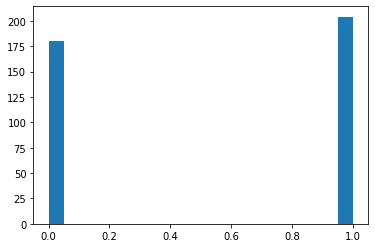

In [8]:
plt.hist(trg, bins = 20);

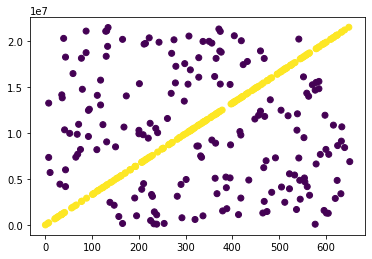

In [9]:
plt.scatter(fmri, audio, c =trg )

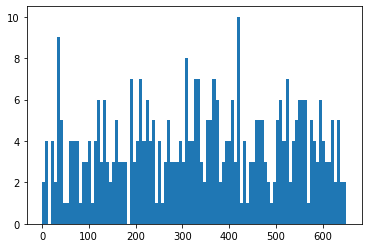

In [10]:
plt.hist(fmri, bins = 100);

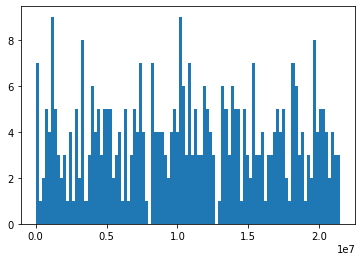

In [11]:
plt.hist(audio, bins = 100);